# Часть 1 Бустинг (5 баллов)

В этой части будем предсказывать зарплату data scientist-ов в зависимости  от ряда факторов с помощью градиентного бустинга.

В датасете есть следующие признаки:



* work_year: The number of years of work experience in the field of data science.

* experience_level: The level of experience, such as Junior, Senior, or Lead.

* employment_type: The type of employment, such as Full-time or Contract.

* job_title: The specific job title or role, such as Data Analyst or Data Scientist.

* salary: The salary amount for the given job.

* salary_currency: The currency in which the salary is denoted.

* salary_in_usd: The equivalent salary amount converted to US dollars (USD) for comparison purposes.

* employee_residence: The country or region where the employee resides.

* remote_ratio: The percentage of remote work offered in the job.

* company_location: The location of the company or organization.

* company_size: The company's size is categorized as Small, Medium, or Large.

In [ ]:
import pandas as pd

df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Задание 1 (0.5 балла) Подготовка



*   Разделите выборку на train, val, test (80%, 10%, 10%)
*   Выдерите salary_in_usd в качестве таргета
*   Найдите и удалите признак, из-за которого возможен лик в данных


In [ ]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

train, test_val = train_test_split(df, test_size=0.2, random_state=1754)
validation, test = train_test_split(test_val, test_size=0.5, random_state=1754)

y_train = train['salary_in_usd']
X_train = train.drop('salary_in_usd', axis = 1)
y_validation = validation['salary_in_usd']
X_validation = validation.drop('salary_in_usd', axis = 1)
y_test = test['salary_in_usd']
X_test = test.drop('salary_in_usd', axis = 1)

#удалим признак salary, т.к. исследуем мы ЗП в долларах, и скорее всего между salary и salary_in_usd очень высокая корреляция

X_train = X_train.drop('salary', axis = 1)
X_validation = X_validation.drop('salary', axis = 1)
X_test = X_test.drop('salary', axis = 1)
X_train

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
248,2023,SE,FT,Analytics Engineer,USD,US,100,US,M
2869,2022,SE,FT,Applied Scientist,USD,US,100,US,M
2752,2022,SE,FT,Data Scientist,USD,US,100,US,M
614,2023,SE,FT,Data Scientist,USD,US,0,US,M
3542,2021,MI,FT,Data Engineer,PLN,PL,100,PL,L
...,...,...,...,...,...,...,...,...,...
2849,2022,SE,FT,Director of Data Science,EUR,FR,50,FR,L
1099,2023,SE,FT,Data Scientist,USD,US,0,US,M
283,2023,SE,FT,Data Analyst,USD,US,100,US,M
1815,2023,SE,FT,Machine Learning Engineer,USD,US,0,US,L


## Задание 2 (0.5 балла) Линейная модель


*   Закодируйте категориальные  признаки с помощью OneHotEncoder
*   Обучите модель линейной регрессии
*   Оцените  качество через MAPE и RMSE


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

np.random.seed(1754)
#дропнем индексы
X_train.reset_index(drop= True , inplace= True)
y_train.reset_index(drop= True , inplace= True)
X_validation.reset_index(drop= True , inplace= True)
y_validation.reset_index(drop= True , inplace= True)
X_test.reset_index(drop= True , inplace= True)
y_test.reset_index(drop= True , inplace= True)

categorical_features = X_train.drop('work_year', axis = 1).drop('remote_ratio', axis = 1).columns

OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OHE.fit(X_train[categorical_features])

s = pd.DataFrame(OHE.transform(X_train[categorical_features]), columns = OHE.get_feature_names_out())
X_train_new = pd.concat([
    X_train.drop(categorical_features, axis = 1).reset_index(),
    s], axis=1)

s = pd.DataFrame(OHE.transform(X_validation[categorical_features]), columns = OHE.get_feature_names_out())
X_validation_new = pd.concat([
    X_validation.drop(categorical_features, axis = 1).reset_index(),
    s], axis=1)

s = pd.DataFrame(OHE.transform(X_test[categorical_features]), columns = OHE.get_feature_names_out())
X_test_new = pd.concat([
    X_test.drop(categorical_features, axis = 1).reset_index(),
    s], axis=1)

lr = LinearRegression()
lr.fit(X_train_new, y_train)

print('MAPE: on train',mean_absolute_percentage_error(y_train, lr.predict(X_train_new)))
print('MAPE: on test',mean_absolute_percentage_error(y_test, lr.predict(X_test_new)))
print('RMSE: on train',np.sqrt(mean_squared_error(y_train, lr.predict(X_train_new))))
print('RMSE: on test',np.sqrt(mean_squared_error(y_test, lr.predict(X_test_new))))

MAPE: on train 0.3024236659834107
MAPE: on test 3556565.691809979
RMSE: on train 44474.739177502925
RMSE: on test 474300689649.3075


## Задание 3 (0.5 балла) XGboost

Начнем с библиотеки xgboost.

Обучите модель `XGBRegressor` на тех же данных, что линейную модель, подобрав оптимальные гиперпараметры (`max_depth, learning_rate, n_estimators, gamma`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

XGB = XGBRegressor(seed=1754)

params = {
    'max_depth' : [1, 3, 5, 7, 10],
    'learning_rate' : [0.1, 0.05, 0.01, 0.001],
    'n_estimators' : [10, 20, 30, 40] ,
    'gamma' : [0.01, 0.05, 0.1, 0.5, 1],
    'sub_sample' : [0.1, 0.3, 0.5, 0.7]
}

gsearch = GridSearchCV(
    estimator=XGB, param_grid=params, n_jobs=-1, cv=5)

gsearch.fit(X_validation_new, y_validation)
gsearch.best_params_, gsearch.best_score_

({'gamma': 0.01,
  'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 30,
  'sub_sample': 0.1},
 0.3527797626895518)

In [ ]:
XGB = XGBRegressor(max_depth =3, learning_rate = 0.1, n_estimators = 30, gamma = 0.01, sub_sample = 0.1, seed=1754)
%timeit XGB.fit(X_train_new, y_train)
%timeit XGB.predict(X_test_new)
print('MAPE: on train',mean_absolute_percentage_error(y_train, XGB.predict(X_train_new)))
print('MAPE: on test',mean_absolute_percentage_error(y_test, XGB.predict(X_test_new)))
print('RMSE: on train',np.sqrt(mean_squared_error(y_train, XGB.predict(X_train_new))))
print('RMSE: on test',np.sqrt(mean_squared_error(y_test, XGB.predict(X_test_new))))

203 ms ± 108 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
30.5 ms ± 940 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
MAPE: on train 0.39743883658572254
MAPE: on test 0.41409843971339866
RMSE: on train 47359.36689673672
RMSE: on test 46668.75809676711


In [ ]:
!pip install optuna

In [ ]:
#можно ещё такой перебор сделать. он и побыстрее, и эффективнее
import optuna

np.random.seed(1754)
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 120, 10)
    max_depth = trial.suggest_int("max_depth", 1, 10)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 1)
    gamma = trial.suggest_float("gamma", 0.001, 0.111)
    sub_sample = trial.suggest_float("sub_sample", 0.1, 1.1)

    XGB = XGBRegressor(seed=1754, n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, gamma = gamma, sub_sample = sub_sample)
    XGB.fit(X_train_new, y_train)
    return mean_absolute_percentage_error(y_validation,XGB.predict(X_validation_new)), np.sqrt(mean_squared_error(y_validation,XGB.predict(X_validation_new)))

study = optuna.create_study(directions=["minimize", 'minimize'])
study.optimize(objective, n_trials=200)

s = study.best_trials
for i in range(len(s)):
  print(s[i].params, s[i].values)

[I 2024-06-11 18:03:46,710] A new study created in memory with name: no-name-f4bacb81-a8a5-4772-be93-815a7dcda1ec
[I 2024-06-11 18:03:47,025] Trial 0 finished with values: [0.35230372652574626, 52999.52823142555] and parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.637426650877618, 'gamma': 0.020937529615352172, 'sub_sample': 0.15414144065664473}. 
[I 2024-06-11 18:03:48,311] Trial 1 finished with values: [0.3645857427095321, 52300.4416111025] and parameters: {'n_estimators': 90, 'max_depth': 5, 'learning_rate': 0.0838133520659492, 'gamma': 0.014088994790172595, 'sub_sample': 0.7407302594782847}. 
[I 2024-06-11 18:03:49,752] Trial 2 finished with values: [0.40978346559685047, 57896.69578582999] and parameters: {'n_estimators': 120, 'max_depth': 6, 'learning_rate': 0.6586154057324894, 'gamma': 0.07263106403866838, 'sub_sample': 0.8888751714189091}. 
[I 2024-06-11 18:03:51,353] Trial 3 finished with values: [0.3812405850799779, 55495.39517611378] and parameters: {'n_es

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.637426650877618, 'gamma': 0.020937529615352172, 'sub_sample': 0.15414144065664473} [0.35230372652574626, 52999.52823142555]
{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.9671229072141923, 'gamma': 0.062109874146100225, 'sub_sample': 0.23647083585485998} [0.35215434994887174, 53116.04709347491]
{'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.15898334196201508, 'gamma': 0.07864490710184058, 'sub_sample': 0.12073421715327595} [0.35409380576016664, 52634.200664793374]
{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.6028303403608645, 'gamma': 0.011814162372730273, 'sub_sample': 0.20367085367321328} [0.35422131777448074, 51677.19446711273]


In [ ]:
#отдадим предпочтение второму перебору. возьмём параметры 'n_estimators': 110, 'max_depth': 3, 'learning_rate': 0.354, 'gamma': 0.099, 'sub_sample': 0.853

XGB = XGBRegressor(max_depth =3, learning_rate = 0.354, n_estimators = 110, gamma = 0.099, sub_sample = 0.853, seed=1754)
%timeit XGB.fit(X_train_new, y_train)
%timeit XGB.predict(X_test_new)
print('MAPE: on train',mean_absolute_percentage_error(y_train, XGB.predict(X_train_new)))
print('MAPE: on test',mean_absolute_percentage_error(y_test, XGB.predict(X_test_new)))
print('RMSE: on train',np.sqrt(mean_squared_error(y_train, XGB.predict(X_train_new))))
print('RMSE: on test',np.sqrt(mean_squared_error(y_test, XGB.predict(X_test_new))))

The slowest run took 4.63 times longer than the fastest. This could mean that an intermediate result is being cached.
644 ms ± 414 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
109 ms ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
MAPE: on train 0.2869884232576355
MAPE: on test 0.40214871567273824
RMSE: on train 41903.32727500661
RMSE: on test 46358.92367505507


## Задание 4 (1 балл) CatBoost

Теперь библиотека CatBoost.

Обучите модель `CatBoostRegressor`, подобрав оптимальные гиперпараметры (`depth, learning_rate, iterations`, etc.) по валидационной выборке. Оцените качество итоговой модели (MAPE, RMSE), скорость обучения и скорость предсказания.

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_seed=1754)
params = {
    'depth' : [1, 3, 5, 7, 10],
    'learning_rate' : [1, 0.5, 0.1, 0.01, 0.001] ,
    'iterations' : [10, 20, 30, 40, 50, 60, 70]
    # -- YOUR CODE HERE --
}

gsearch_cat = GridSearchCV(
    estimator=cat, param_grid=params, n_jobs=-1, cv=5)

gsearch_cat.fit(X_validation_new, y_validation)
gsearch_cat.best_params_, gsearch_cat.best_score_

0:	learn: 64816.1043562	total: 7.52ms	remaining: 519ms
1:	learn: 63254.9823323	total: 9.39ms	remaining: 319ms
2:	learn: 61850.4501137	total: 10.5ms	remaining: 234ms
3:	learn: 60565.2389933	total: 11.5ms	remaining: 189ms
4:	learn: 59522.1230305	total: 13ms	remaining: 169ms
5:	learn: 58705.2022386	total: 16.5ms	remaining: 176ms
6:	learn: 57889.0194094	total: 17.6ms	remaining: 158ms
7:	learn: 56987.7662251	total: 18.5ms	remaining: 144ms
8:	learn: 56510.2435278	total: 20.7ms	remaining: 140ms
9:	learn: 55731.0125255	total: 22.5ms	remaining: 135ms
10:	learn: 55395.2555399	total: 24.5ms	remaining: 132ms
11:	learn: 54706.9988598	total: 25.6ms	remaining: 124ms
12:	learn: 54389.6470952	total: 29.8ms	remaining: 131ms
13:	learn: 54023.9707653	total: 31ms	remaining: 124ms
14:	learn: 53622.2086543	total: 32.1ms	remaining: 118ms
15:	learn: 53375.2768149	total: 34.2ms	remaining: 115ms
16:	learn: 53081.8972685	total: 35.5ms	remaining: 111ms
17:	learn: 52543.2149373	total: 36.9ms	remaining: 107ms
18:	le

({'depth': 5, 'iterations': 70, 'learning_rate': 0.1}, 0.36196277044593356)

In [ ]:
cat = CatBoostRegressor(depth = 5, learning_rate = 0.1, iterations = 70, random_seed=1754)
%timeit cat.fit(X_train_new, y_train)
%timeit cat.predict(X_test_new)
print('MAPE: on train',mean_absolute_percentage_error(y_train, cat.predict(X_train_new)))
print('MAPE: on test',mean_absolute_percentage_error(y_test, cat.predict(X_test_new)))
print('RMSE: on train',np.sqrt(mean_squared_error(y_train, cat.predict(X_train_new))))
print('RMSE: on test',np.sqrt(mean_squared_error(y_test, cat.predict(X_test_new))))

0:	learn: 60868.6890733	total: 8.47ms	remaining: 585ms
1:	learn: 59041.6819098	total: 11.5ms	remaining: 391ms
2:	learn: 57457.2875819	total: 13.5ms	remaining: 301ms
3:	learn: 56038.3953726	total: 15.4ms	remaining: 254ms
4:	learn: 55152.7887857	total: 17.3ms	remaining: 225ms
5:	learn: 54244.8295794	total: 18.8ms	remaining: 200ms
6:	learn: 53534.2579898	total: 20.8ms	remaining: 187ms
7:	learn: 52916.8464653	total: 25ms	remaining: 193ms
8:	learn: 52315.6323050	total: 28.6ms	remaining: 194ms
9:	learn: 51869.3762388	total: 33.2ms	remaining: 199ms
10:	learn: 51428.7286158	total: 35.9ms	remaining: 192ms
11:	learn: 51150.6072295	total: 41.4ms	remaining: 200ms
12:	learn: 50850.4418687	total: 44.4ms	remaining: 195ms
13:	learn: 50507.8245468	total: 48.3ms	remaining: 193ms
14:	learn: 50228.1440516	total: 50.2ms	remaining: 184ms
15:	learn: 49964.8786523	total: 52.1ms	remaining: 176ms
16:	learn: 49777.9134872	total: 55.3ms	remaining: 173ms
17:	learn: 49583.0517686	total: 57.7ms	remaining: 167ms
18:	

Для применения catboost моделей не обязательно сначала кодировать категориальные признаки, модель может кодировать их сама. Обучите catboost с подбором оптимальных гиперпараметров снова, используя pool для передачи данных в модель с указанием какие признаки категориальные, а какие нет с помощью параметра cat_features. Оцените качество и время. Стало ли лучше?

In [ ]:
from catboost import Pool

pool_train = Pool(data = X_train, label = y_train, cat_features= list(categorical_features))
pool_validation = Pool(data = X_validation, label = y_validation, cat_features= list(categorical_features))
pool_test = Pool(data = X_test, label = y_test, cat_features= list(categorical_features))


params = {
    'depth' : [1, 3, 5, 7, 10],
    'learning_rate' : [1, 0.5, 0.1, 0.01, 0.001] ,
    'iterations' : [10, 20, 30, 40, 50, 60, 70],
    'loss_function': ['RMSE']
}


gsearch_cat = GridSearchCV(estimator=cat, param_grid=params, n_jobs=-1, cv=5)

gsearch_cat.fit(X_validation, y_validation, cat_features = categorical_features.values)
gsearch_cat.best_params_, gsearch_cat.best_score_

0:	learn: 64582.5303528	total: 4.74ms	remaining: 280ms
1:	learn: 63224.1195500	total: 12.8ms	remaining: 371ms
2:	learn: 61880.0281460	total: 15.6ms	remaining: 297ms
3:	learn: 60618.9111638	total: 18.7ms	remaining: 262ms
4:	learn: 59494.6127833	total: 23.4ms	remaining: 258ms
5:	learn: 58484.9193918	total: 27.9ms	remaining: 251ms
6:	learn: 57492.7322955	total: 29.6ms	remaining: 224ms
7:	learn: 56748.9594599	total: 31.6ms	remaining: 206ms
8:	learn: 56173.0871623	total: 33.3ms	remaining: 189ms
9:	learn: 55471.4550042	total: 34.6ms	remaining: 173ms
10:	learn: 54936.2605430	total: 36.5ms	remaining: 163ms
11:	learn: 54473.2262589	total: 38.5ms	remaining: 154ms
12:	learn: 54088.7222173	total: 39.4ms	remaining: 142ms
13:	learn: 53722.5101578	total: 41.2ms	remaining: 136ms
14:	learn: 53490.1934505	total: 42ms	remaining: 126ms
15:	learn: 53160.2308652	total: 43.8ms	remaining: 121ms
16:	learn: 52804.6573096	total: 45.7ms	remaining: 116ms
17:	learn: 52630.7875627	total: 46.7ms	remaining: 109ms
18:	

({'depth': 7, 'iterations': 60, 'learning_rate': 0.1, 'loss_function': 'RMSE'},
 0.3567611617703038)

In [ ]:
cat_pool = CatBoostRegressor(depth = 7, learning_rate = 0.1, iterations = 60, random_seed=1754)
%timeit cat_pool.fit(pool_train)
%timeit cat_pool.predict(pool_test)
print('MAPE: on train',mean_absolute_percentage_error(y_train, cat_pool.predict(pool_train)))
print('MAPE: on test',mean_absolute_percentage_error(y_test, cat_pool.predict(pool_test)))
print('RMSE: on train',np.sqrt(mean_squared_error(y_train, cat_pool.predict(pool_train))))
print('RMSE: on test',np.sqrt(mean_squared_error(y_test, cat_pool.predict(pool_test))))

0:	learn: 60865.1839243	total: 8.29ms	remaining: 489ms
1:	learn: 59302.8979150	total: 16.8ms	remaining: 487ms
2:	learn: 57921.4105732	total: 20.8ms	remaining: 395ms
3:	learn: 56740.6514328	total: 24.1ms	remaining: 337ms
4:	learn: 55740.0125977	total: 27.5ms	remaining: 302ms
5:	learn: 54915.1014806	total: 33.1ms	remaining: 298ms
6:	learn: 54224.7002642	total: 36.9ms	remaining: 279ms
7:	learn: 53612.0291968	total: 40.5ms	remaining: 263ms
8:	learn: 53146.7361818	total: 43.7ms	remaining: 247ms
9:	learn: 52771.7223242	total: 46.7ms	remaining: 234ms
10:	learn: 52429.3570141	total: 49.9ms	remaining: 222ms
11:	learn: 52109.0009749	total: 53.3ms	remaining: 213ms
12:	learn: 51524.8234491	total: 56.8ms	remaining: 205ms
13:	learn: 51023.8578147	total: 59.9ms	remaining: 197ms
14:	learn: 50620.9092143	total: 63.1ms	remaining: 189ms
15:	learn: 50274.2166822	total: 66.4ms	remaining: 183ms
16:	learn: 49974.2265259	total: 70ms	remaining: 177ms
17:	learn: 49719.8186230	total: 73.3ms	remaining: 171ms
18:	

В итоге CatBoost с помощью Pool показал себя гораздо лучше в минимизации MAPE, но при этом RMSE вырос на доли процента. К тому же, с использованием Pool модель обучается и делает предсказания быстрее.

## Задание 5 (0.5 балла) LightGBM

И наконец библиотека LightGBM - используйте `LGBMRegressor`, снова подберите гиперпараметры, оцените качество и скорость.


In [ ]:
from lightgbm import LGBMRegressor


params = {
    'max_depth' : [1, 3, 5, 7, 10, 12],
    'learning_rate' : [0.5, 0.1, 0.01, 0.001, 0.7, 1, 0.05, 0.005] ,
    'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110] ,
    'num_leaves' : [2, 5, 7, 10, 12, 16, 20]
}
lgbm = LGBMRegressor(random_seed=1754)

gsearch_lgbm = GridSearchCV(estimator=lgbm, param_grid=params, n_jobs=-1, cv=5)

gsearch_lgbm.fit(X_validation_new.values, y_validation.values)
gsearch_lgbm.best_params_, gsearch_lgbm.best_score_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 375, number of used features: 16
[LightGBM] [Info] Start training from score 143682.656000


({'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 70, 'num_leaves': 5},
 0.3389490089524478)

In [ ]:
lgbm = LGBMRegressor(max_depth = 5, learning_rate = 0.05, n_estimators = 70, num_leaves = 5, random_seed=1754)

%timeit lgbm.fit(X_train_new, y_train)
%timeit lgbm.predict(X_test_new)
print('MAPE: on train',mean_absolute_percentage_error(y_train, lgbm.predict(X_train_new)))
print('MAPE: on test',mean_absolute_percentage_error(y_test, lgbm.predict(X_test_new)))
print('RMSE: on train',np.sqrt(mean_squared_error(y_train, lgbm.predict(X_train_new))))
print('RMSE: on test',np.sqrt(mean_squared_error(y_test, lgbm.predict(X_test_new))))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 3004, number of used features: 44
[LightGBM] [Info] Start training from score 136664.725366
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 3004, number of used features: 44
[LightGBM] [Info] Start training from score 136664.725366
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead

## Задание 6 (2 балла) Сравнение и выводы

Сравните модели бустинга и сделайте про них выводы, какая из моделей показала лучший/худший результат по качеству, скорости обучения и скорости предсказания? Как отличаются гиперпараметры для разных моделей?

Начнём c XGBoost, это довольно медленная модель и использование с ней GridSearchCV просто невозможно, код работает минут 15-20. Поэтому был использован метод из библиотеки optuna (там могут не совпасть опитимальные гиперпараметры при разных инициализациях кода, но +- всё одинаково по качеству). Из четырёх моделей XGBoost показал худший результат по минимизации MAPE и RMSE (0.4021 и 46358 соответственно). Время обучения и предсказания самое высокое из 4 моделей. При этом имеются такие гиперпараметры gamma (контролирует, будет ли узел разбиваться на основе ожидаемого уменьшения потерь после разделения. Чем выше значение, тем меньше разбиений.) и sub_sample (доля выборок, которая будет использоваться для обучения) от которых тоже зависит качество модели.

Вторая по качеству модель LightGBM. Полученные MAPE и RMSE на тестовой выборке немного ниже, чем у XGBoost (0.3939 и 46338 соответственно). При этом время обучения самое низкое из представленных моделей, а время предсказания на втором месте по скорости. GridSearchCV здесь тоже сработал быстрее всего. В модели был использован только 1 уникальных параметр num_leaves, который отвечает за максимальное количество листьев в базовых моделях.

Далее по качеству идёт модель CatBoost без использования pool. Данная модель является третьей по скорости моделью в обучении и третьей в предсказании. Величины MAPE и RMSE равны 0.3871 и 0.46139 соответственно. Тут я никаких новых параметров не использовал, так как остальные гиперпараметры отвечают за различные методы разбиения объектов при помощи предикатов, и уж пусть они лучше будут дефолтные.

Лучшей по качеству моделью оказалась CatBoost с использованием pool. Полученные значения MAPE и RMSE равны 0.3846 и 45785. При этом модель является второй по скоростив обучении, но при этом предсказывает она в разы быстрее того же LightGBM. По моему мнению, это даёт ей право считаться лучшей для использования в данном случае. В ней так же не были использованы новые гиперпараметры, кроме loss_function. Но, как я понял, она в итоге ни на что не повлияла от слова совсем.

# Часть 2 Кластеризация (5 баллов)

Будем работать с данными о том, каких исполнителей слушают пользователи музыкального сервиса.

Каждая строка таблицы - информация об одном пользователе. Каждый столбец - это исполнитель (The Beatles, Radiohead, etc.)

Для каждой пары (пользователь, исполнитель) в таблице стоит число - доля прослушивания этого исполнителя этим пользователем.


In [ ]:
import pandas as pd
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Будем строить кластеризацию исполнителей: если двух исполнителей слушало много людей примерно одинаковую долю своего времени (то есть векторы близки в пространстве), то, возможно исполнители похожи. Эта информация может быть полезна при построении рекомендательных систем.

## Задание 1 (0.5 балла) Подготовка

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [ ]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [ ]:
ratings = ratings.drop('user', axis = 0)

В таблице много пропусков, так как пользователи слушают не всех-всех исполнителей, чья музыка представлена в сервисе, а некоторое подмножество (обычно около 30 исполнителей)


Доля исполнителя в музыке, прослушанной  пользователем, равна 0, если пользователь никогда не слушал музыку данного музыканта, поэтому заполните пропуски нулями.



In [ ]:
ratings = ratings.fillna(0)
ratings.sample()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
limpt bizkit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Задание 2 (0.5 балла) Первая кластеризация

Примените KMeans с 5ю кластерами, сохраните полученные лейблы

In [ ]:
from sklearn.cluster import KMeans
np.random.seed(90)
k_means = KMeans(n_clusters = 5)
k_means = k_means.fit(ratings)
clusters = k_means.predict(ratings)

Выведите размеры кластеров. Полезной ли получилась кластеризация? Почему KMeans может выдать такой результат?

In [ ]:
np.bincount(clusters)

array([983,  14,   1,   1,   1])

Кластеризация получилась абсолютно бесполезной, так как в 4 из 5 кластеров у нас 1 объект. Скорее всего это происходит из-за того, что KMeans случайно выбирает центры кластеров. При этом если данные не отнормированы, а они у нас таковыми и являются, то это как раз может сказаться на плохом выборе центров кластеров. Ещё проблемой может быть изначально заданное число кластеров.
(Скорее всего влияет именно первая причина, тк я попробовал позадавать побольше кластеров, и это никак не улучшило результат).

P.S. я потыкал разные сиды, и от этого меняется количество объектов в кластерах

## Задание 3 (0.5 балла) Объяснение результатов

При кластеризации получилось $\geq 1$ кластера размера 1. Выведите исполнителей, которые составляют такие кластеры. Среди них должна быть группа The Beatles.

In [ ]:
s = [2, 3, 4]
for i in range(len(ratings.index)):
  if clusters[i] in s:
    print(ratings.index[i])

the beatles
ルートヴィヒ・ヴァン・ベートーヴェン
various korean artists


Изучите данные, почему именно The Beatles выделяется?

Подсказка: посмотрите на долю пользователей, которые слушают каждого исполнителя, среднюю долю прослушивания.

In [ ]:
s = pd.DataFrame({'доля слушателей' : np.count_nonzero(ratings, axis = 1)/5000}, index = ratings.index)
s

,доля слушателей
the beatles,0.3342
radiohead,0.2778
deathcab for cutie,0.1862
coldplay,0.1682
modest mouse,0.1628
...,...
michal w. smith,0.0094
群星,0.0094
agalloch,0.0094
meshuggah,0.0094


In [ ]:
s[s['доля слушателей'] == max(s['доля слушателей'])]

,доля слушателей
the beatles,0.3342


In [ ]:
f = pd.DataFrame({'средняя доля прослушивания' : np.mean(ratings, axis = 1)}, index = ratings.index)
f

,средняя доля прослушивания
the beatles,0.018369
radiohead,0.011851
deathcab for cutie,0.006543
coldplay,0.006030
modest mouse,0.005876
...,...
michal w. smith,0.000895
群星,0.000519
agalloch,0.000997
meshuggah,0.000431


In [ ]:
f[f['средняя доля прослушивания'] == max(f['средняя доля прослушивания'])]

,средняя доля прослушивания
the beatles,0.018369


The Beatles имеет максимальную долю прослушиваний и максимальную среднюю долю прослушивания среди представленных исполнителей. Скорее всего, именно поэтому они и выделяются.

## Задание 4 (0.5 балла) Улучшение кластеризации

Попытаемся избавиться от этой проблемы: нормализуйте данные при помощи `normalize`.

In [ ]:
from sklearn.preprocessing import normalize

ratings_norm = normalize(ratings)

Примените KMeans с 5ю кластерами на преобразованной матрице, посмотрите на их размеры. Стало ли лучше? Может ли кластеризация быть полезной теперь?

In [ ]:
np.random.seed(90)
k_means = KMeans(n_clusters = 5)
k_means = k_means.fit(ratings_norm)
clusters = k_means.predict(ratings_norm)
np.bincount(clusters)

array([149, 103, 319, 282, 147])

После нормализации данных использование кластеризации стало обосновано. Теперь отсутствуют супер маленькие кластеры, как было в самом начале. Самый маленький кластер включает в себя 149 объектов, что составляет почти 15% выборки. Это очень даже неплохо.

## Задание 5 (1 балл) Центроиды

Выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду по косинусной мере. Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

In [ ]:
df = pd.DataFrame(ratings_norm)

In [ ]:
from scipy.spatial.distance import cosine

centroids = k_means.cluster_centers_
m = list()
for i in range(5):
  d = {}
  ind = np.where(clusters == i)
  for j in ind:
    for k in j:
      d[df.index[k]] = cosine(df.T[k].values, centroids[i])
  d = sorted(d.items(), key=lambda x:x[1])[:10]
  m.append(d)
f = []
for i in m:
  s = []
  for j in i:
    s.append(ratings.index[j[0]])
  f.append(s)
s = pd.DataFrame(f).T
s.rename(columns = {0: 'cluster 1', 1: 'cluster 2', 2: 'cluster 3', 3: 'cluster 4', 4: 'cluster 5'})

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5
0,the beatles,nas,system of a down,radiohead,fall out boy
1,the rolling stones,jay-z,metallica,the arcade fire,paramore
2,dylan. bob,kanye west,blink-182,animal collective,the all-americian rejects
3,who,a tribe called quest,koЯn,broken social scene,kelly clarkson
4,led zeppelin.,the roots featuring d'angelo,tool,sufjan stevens,john mayer
5,simon and garfunkel,lupe the gorilla,niИ,belle and sebastian,the fray
6,"young, neil",mos def,ratm,the shins,dashboard confesssional
7,bruce springsteen,little brother,‌linkin park,of montreal,maroon5
8,r.e.m.,gangstarr,incubus,beirut,somethings corporate
9,pink fluid,talib kweli,foo fighters,deathcab for cutie,cartel


Подозреваю, что в первом кластере у нас находятся рок группы (возможно только старые) и тогда это объясянет, почему ближе всего к центру находятся The Beatles. Во втором кластере у нас находятся реп-исполнители, поэтому ближе всего к центру расположились Nas, Jay-Z и Kanye West. В третьем кластере находятся группы, которые исполняют рок в стиле металл (я конечно видел знал названия некоторых из этих групп, но никогда не слушал). В четвёртом кластере находятся рок-группы, исполняющие инди-рок и панк-рок. В пятый кластер попали рок-группы, исполняющие поп-рок, поэтому близко к центру расположились fall out boy и paramone.

## Задание 6 (1 балл) Визуализация

Хотелось бы как-то визуализировать полученную кластеризацию. Постройте точечные графики `plt.scatter` для нескольких пар признаков исполнителей, покрасив точки в цвета кластеров. Почему визуализации получились такими? Хорошо ли они отражают разделение на кластеры? Почему?

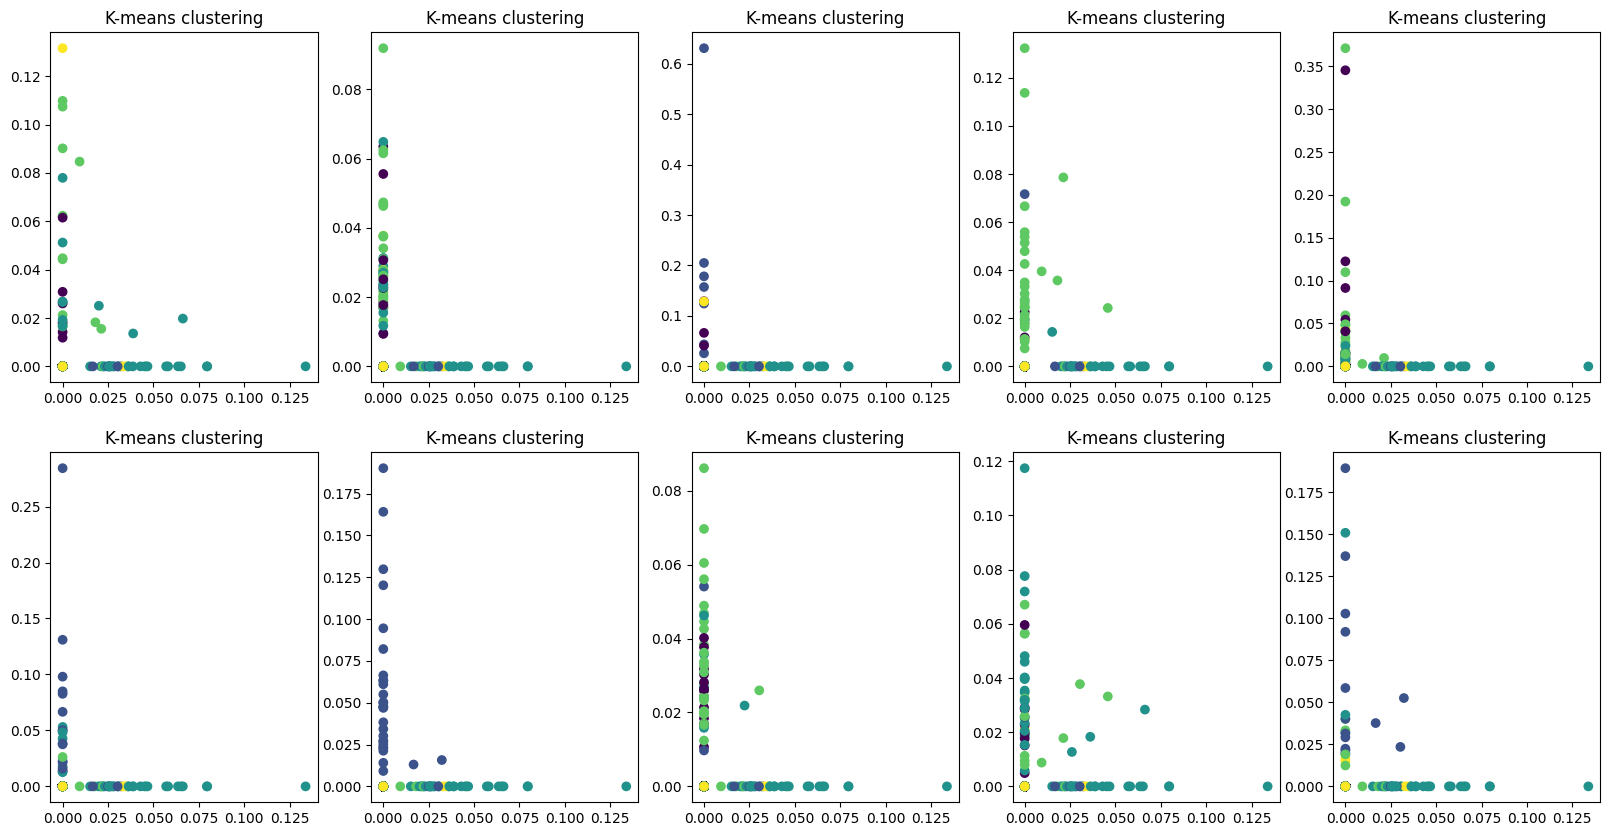

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize= (20,10))

for i in range(1, 11):
  plt.subplot(2, 5, i)
  plt.scatter(ratings_norm[:,0], ratings_norm[:,i], c = clusters)
  plt.title('K-means clustering')
plt.show()

Данные графики плохо отражают разделение объектов по кластерам. Скорее всего это происходит из-за того, что много объектов имеют нулевые признаки и поэтому они располагаются либо на горизонтальной, либо на вертикальной линиях.

Для визуализации данных высокой размерности существует метод t-SNE (стохастическое вложение соседей с t-распределением). Данный метод является нелинейным методом снижения размерности: каждый объект высокой размерности будет моделироваться объектов более низкой (например, 2) размерности таким образом, чтобы похожие объекты моделировались близкими, непохожие - далекими с большой вероятностью.

Примените `TSNE` из библиотеки `sklearn` и визуализируйте полученные объекты, покрасив их в цвета их кластеров

In [ ]:
from sklearn.manifold import TSNE
np.random.seed(90)
tsne = TSNE()

ratings_new = tsne.fit_transform(ratings_norm)

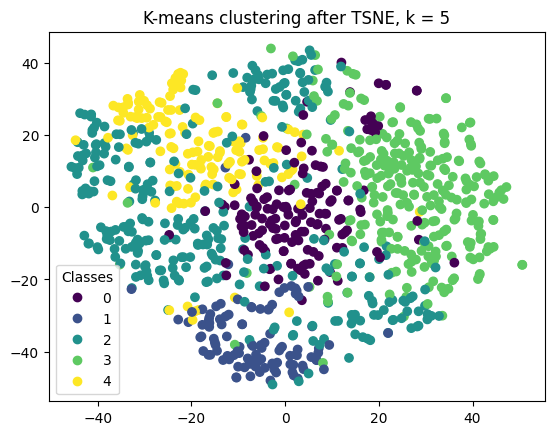

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(ratings_new[:,0], ratings_new[:,1], c = clusters)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
plt.title('K-means clustering after TSNE, k = 5')
plt.show()

## Задание 7 (1 балл) Подбор гиперпараметров

Подберите оптимальное количество кластеров (максимум 100 кластеров) с использованием индекса Силуэта. Зафиксируйте `random_state=42`

In [ ]:
from sklearn.metrics import silhouette_score

best_k, best_score = None, -1
for k in range(2,101):
    k_means = KMeans(n_clusters = k, random_state=42)
    k_means = k_means.fit(ratings_norm)
    clusters = k_means.predict(ratings_norm)
    score = np.round(silhouette_score(X=ratings_norm,
                             labels=clusters), 2)
    if score > best_score:
      best_score = score
      best_k = k
print('Best score {}, k = {}'.format(best_score, best_k))

Best score 0.02, k = 95


Выведите исполнителей, ближайших с центроидам (аналогично заданию 5). Как соотносятся результаты? Остался ли смысл кластеров прежним? Расскажите про смысл 1-2 интересных кластеров, если он изменился и кластеров слишком много, чтобы рассказать про все.

In [ ]:
k_means = KMeans(n_clusters = 95, random_state=42)
k_means = k_means.fit(ratings_norm)
clusters = k_means.predict(ratings_norm)

centroids = k_means.cluster_centers_
m = list()
for i in range(95):
  d = {}
  ind = np.where(clusters == i)
  for j in ind:
    for k in j:
      d[df.index[k]] = cosine(df.T[k].values, centroids[i])
  d = sorted(d.items(), key=lambda x:x[1])[:10]
  m.append(d)
f = []
for i in m:
  s = []
  for j in i:
    s.append(ratings.index[j[0]])
  f.append(s)
s = pd.DataFrame(f).T
s

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,circa survive,the brian jonestown massacre,squarepusher.,talib kweli,mgmt,my bloody valentine,destinys child,the all-americian rejects,u2,the lawrence arms,...,evril lavigne,shiny toy guns,eminem,gillian welch,akira yamaoka,lamb,ray charles,underoath,sly & the family stone,boston
1,portugal. the man,spiritualized®,autechre,the roots featuring d'angelo,vampire weekend,deerhunter,janet jackson.,plain white t＇s,r.e.m.,jawbreaker,...,rent: original broadway cast,she wants revenge,50 cent,townes van zandt,kaki king,nightmares on wax?,the band,norma jean,curtis mayfield,foreigner-
2,cursive,black rebel motorcycle club,amon tobin,mos def,tokyo police club,animal collective,rihanna & jay-z,the red jumpsuit apparatus,coldplay,dillinger four,...,michelle branch,cascada,big l,neko case,the offspring,tйlйpopmusik,stevens. cat,emery,prince,styx
3,citya and colour,the dandy warhols,boards of canada,little brother,ratatat,slowdive,mariah carey,hellogoodbye,bruce springsteen,the glaslight anthem,...,the goo goo dools,None,tupak shakur,old crow medicine show,None,tosca,"reinhardt, django",saosin,james brown,the cars
4,the blood brothers,the verve,aphex twin,common,kings of leon,beach house,mary j. blige,secondhand serenade,bon jovi,alkaline trio,...,nelly furtado,None,dr. dre,josh ritter,None,the cinematic orchestra,cocteau twins,a day to remember,snoop doggy dogg featuring jd,eltron john
5,coheed and cambria,silver jews,prefuse 73,jurassic 5,the klaxons,asobi seksu,the pussycat dolls,the fray,oasis,hot water music,...,tatu,None,immortal technique,npr,None,morcheeba,None,silverstein,the cramps,the eagles
6,four year strong,None,underworld,cunninlynguists,justice,liars,beyoncé,mae,oingo boingo,descendents,...,good charlotte,None,m.i.a.,None,None,tricky & dj muggs & grease,None,alexisonfire,None,journey
7,owen,None,rjd2,None,los campesinos!,broadcast,aaliyah,blue october,indigo girlz,lifetime,...,pink,None,bone: thugs~n~harmony,None,None,röyksopp,None,fear before the march of flames,None,billy joel
8,why?,None,burial,None,the dodos,pavement,alicia keys,bowling for soup,jon brion,propagandhi,...,veronicas,None,chamillionaire,None,None,sia,None,hawthorne heights,None,jack’s mannequin
9,manchester orchestra,None,björk guğmunsdóttir,None,au rivoir simone,the jesus and mary chain,fergie,lostprophets,None,lucero,...,backstreet boys,None,the block eyed peas,None,None,imogen_heap,None,thursday,None,None


По итогам подбора количества кластеров оптимальным оказалось число 95. Это в 19 раз больше, чем мы пробовали до этого, и именно поэтому смысл кластеров изменился довольно сильно. Если до этого мы получили 5 кластеров с основными направлениями рока, то тут направления стали уже более специфичными. Некоторые кластеры даже включают в себя меньше 10 объектов. Например, если рассмотреть второй кластер (под номером 1 в таблице), то там собраны группы, которые прославились за исполнение психоделического и нео-психоделического рока. Ещё можно выделить десятый кластер (под номером 9 в таблице), потому что их отличительными особенностями является то, что они все исполняли панк-рок и хард-рок, а также то, что преимущественно появлялись в Чикаго (так они все из США).

Сделайте t-SNE визуализацию полученной кластеризации.

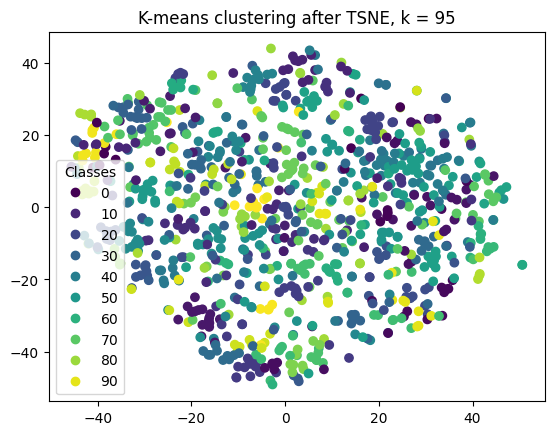

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(ratings_new[:,0], ratings_new[:,1], c = clusters)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
plt.title('K-means clustering after TSNE, k = 95')
plt.show()

Если кластеров получилось слишком много и визуально цвета плохо отличаются, покрасьте только какой-нибудь интересный кластер из задания выше (`c = (labels == i)`). Хорошо ли этот кластер отражается в визуализации?

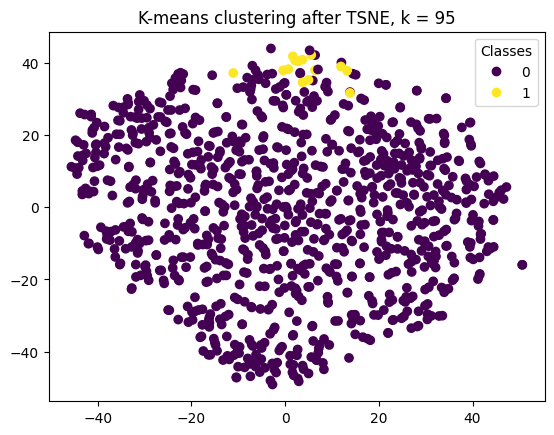

In [ ]:
fig, ax = plt.subplots()

scatter = ax.scatter(ratings_new[:,0], ratings_new[:,1], c = (k_means.labels_ == 9))
legend = ax.legend(*scatter.legend_elements(), title="Classes")
plt.title('K-means clustering after TSNE, k = 95')
plt.show()

Десятый кластер (он 9-ый в таблице) расположился довольно кучно вверху графика. Конечно, наверняка есть и такие кластеры, которые прям очень хорошо отделились, но и приведённый выше тоже неплохо себя показал. Если, например, посмотреть на второй кластер, то его видно очень плохо из-за его маленького размера и плохой кучности.